# Declarations

Please run below to start up.

In [137]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import time
import random
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import Declaration

# Starter

Run the cell below after running the code above. In this cell, you can customize any parameter you want.

In [138]:
carRateMean = widgets.FloatSlider(value=3.0,min=0.1, max=100.0, step=0.1, description='carRateMean: ')
carRateVar = widgets.FloatSlider(value=3.0,min=0, max=100.0, step=0.1, description='carRateVariance: ')

carMoveProb = widgets.FloatSlider(value=0.5,min=0.0, max=1.0,step =0.001, description='moveProb:')
acciProb = widgets.FloatSlider(value=0.05,min=0.0, max=1.0,step =0.001, description='acciProb:')

numOfCell = widgets.IntSlider(value=10,min=10, max=100, step=1, description='numOfCell: ')
introRate = widgets.FloatSlider(value=3.0,min=0.1, max=100.0, step=0.1, description='introRate: ')
remvRate = widgets.FloatSlider(value=3.0,min=0.1, max=100.0, step=0.1, description='remvRate: ')

ui = widgets.VBox([carRateMean, carRateVar, carMoveProb, acciProb, numOfCell, introRate, remvRate])

def f(carRateMean, carRateVar, carMoveProb, acciProb, numOfCell, introRate, remvRate):
    print('Now on our roads: \n'+' The speed of the cars is a normal distribution with mean '+str(carRateMean),'and variance '+str(carRateVar)+'\n', 'The probability that each of the cars move is '+str(carMoveProb)+', and with the probability of '+str(acciProb)+' that each car goes into accident.\n', 'At the same time, there are '+str(numOfCell)+' cars at most on our roads.\n', 'The cars go into the roads at a rate of '+str(introRate)+'\n', 'The cars leave the roads at a rate of '+str(remvRate)+'\n')
    return(carRateMean,carRateVar, carMoveProb, numOfCell, introRate, remvRate)

out = widgets.interactive_output(f, {'acciProb':acciProb,'carRateVar': carRateVar,'remvRate': remvRate, 'introRate': introRate, 'numOfCell': numOfCell, 'carMoveProb':carMoveProb , 'carRateMean': carRateMean})

print('Please use the sliders below to adjust the parameters. They are: carRateMean, carRateVar, carMoveProb, acciProb, numOfCell, introRate, remvRate')

display(ui, out)

# print(carRate.value)

# def on_value_change(change):
#     with out:
#         print(change['new'])
#     return change['new']

# print(numOfCell.observe(on_value_change, names='value'))

print("Now we are ready for the simulations.")

Please use the sliders below to adjust the parameters. They are: carRateMean, carRateVar, carMoveProb, acciProb, numOfCell, introRate, remvRate


Output()

Now we are ready for the simulations.


# Simulation
First, let's see the road condition for a discrete road.

<IPython.core.display.Javascript object>


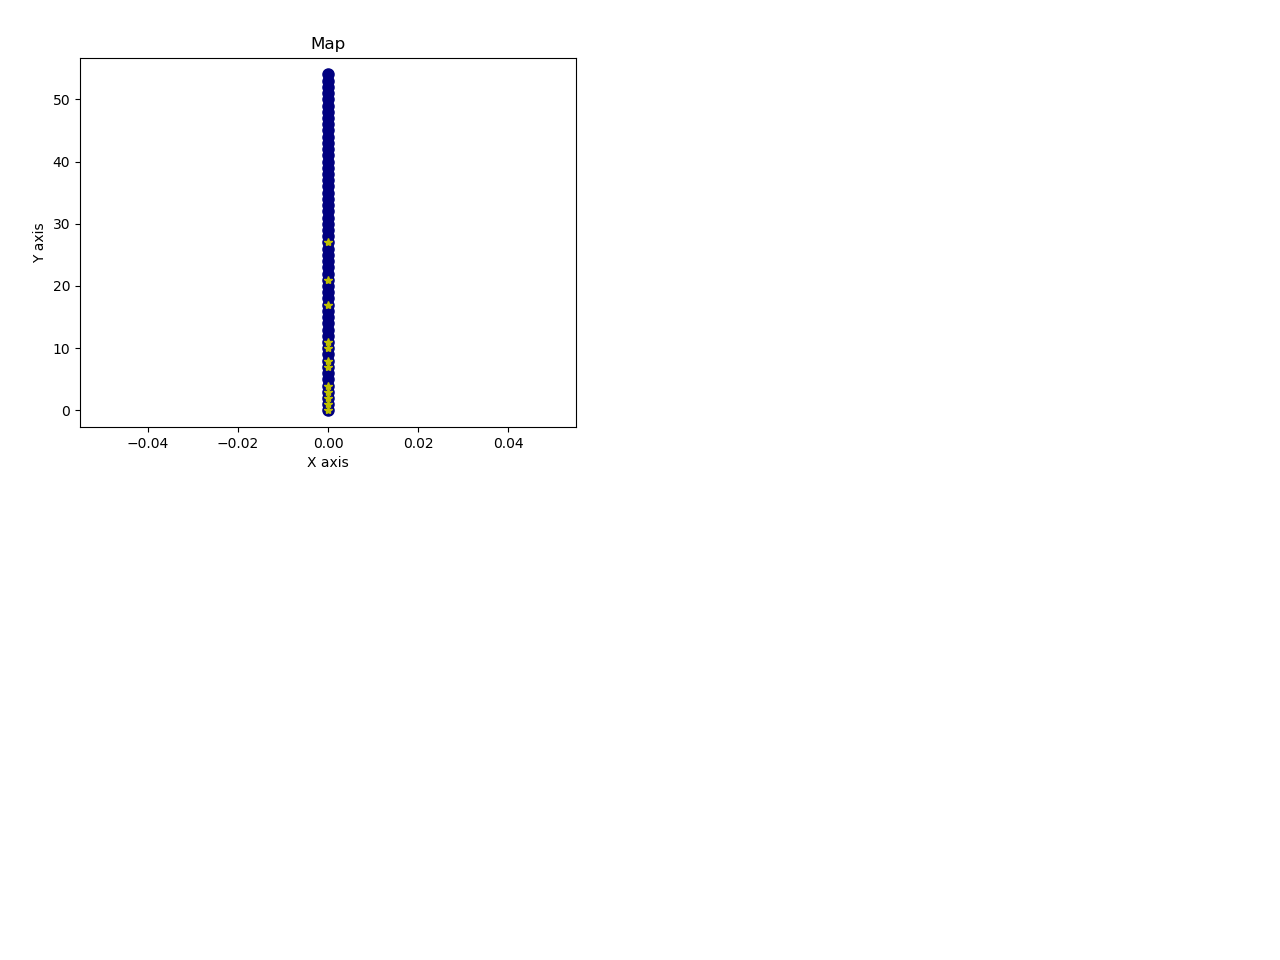

KeyboardInterrupt: 

In [140]:
%matplotlib notebook
TOTAL_TIME = 100
interval = 0.01

fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

SF = City(acciProb=acciProb.value,totalTime=TOTAL_TIME, interval=interval, name = 'SF')
SF.freshMap()
dist = {'mean':carRateMean.value,'var':carRateVar.value}
SF.createRoad(numOfCell=numOfCell.value, moveProb=carMoveProb.value, introRate=introRate.value, remvRate=remvRate.value, carRate=dist)
startTime = 0
Stop = False
currentTime = startTime - interval

fig.show()
fig.canvas.draw()

while not Stop:
    currentTime = currentTime + interval
    if currentTime > TOTAL_TIME:
        Stop = True
    SF.introCar()
    SF.remvCar()
    #SF.moveCar()
    ###########################
    SF.moveCarWithCRA()
    ###########################
    SF.showCitySub()
    time.sleep(0.05)
#     print (len(SF.roads[0].allCars),end=' ')

What about crossroads? Let's see what will happen if there are two roads coincident with each other.

<IPython.core.display.Javascript object>


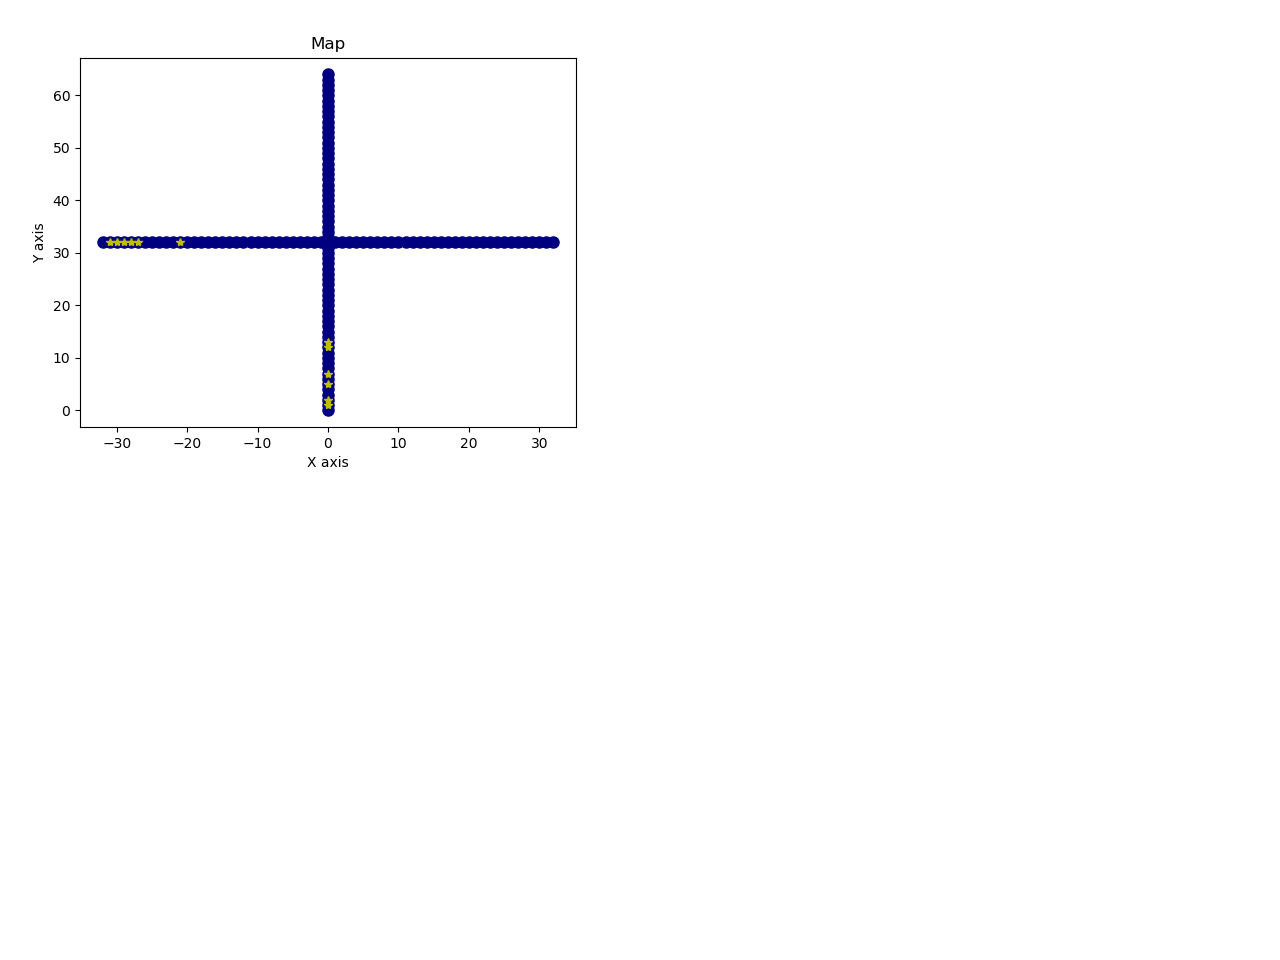

KeyboardInterrupt: 

In [132]:
%matplotlib notebook
TOTAL_TIME = 1
interval = 0.01

fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()
dist = {'mean':carRateMean.value,'var':carRateVar.value}
SF = City(acciProb=acciProb.value,totalTime=TOTAL_TIME, interval=interval, name = 'SF')
SF.freshMap()
SF.createRoad(numOfCell=numOfCell.value, moveProb=carMoveProb.value, introRate=introRate.value, remvRate=remvRate.value, carRate=dist)
SF.createRoad(direction = (1,0), startPos = (-int(numOfCell.value/2),int(numOfCell.value/2)), numOfCell=numOfCell.value, moveProb=carMoveProb.value, introRate=introRate.value, remvRate=remvRate.value, carRate=dist)
startTime = 0
Stop = False
currentTime = startTime - interval

fig.show()
fig.canvas.draw()

while not Stop:
    currentTime = currentTime + interval
    if currentTime > TOTAL_TIME:
        Stop = True
    SF.introCar()
    SF.remvCar()
    #SF.moveCar()
    ###########################
    SF.moveCarWithCRA()
    ###########################
    SF.showCitySub()
    time.sleep(0.05)
#     print (len(SF.roads[0].allCars),end=' ')

<IPython.core.display.Javascript object>


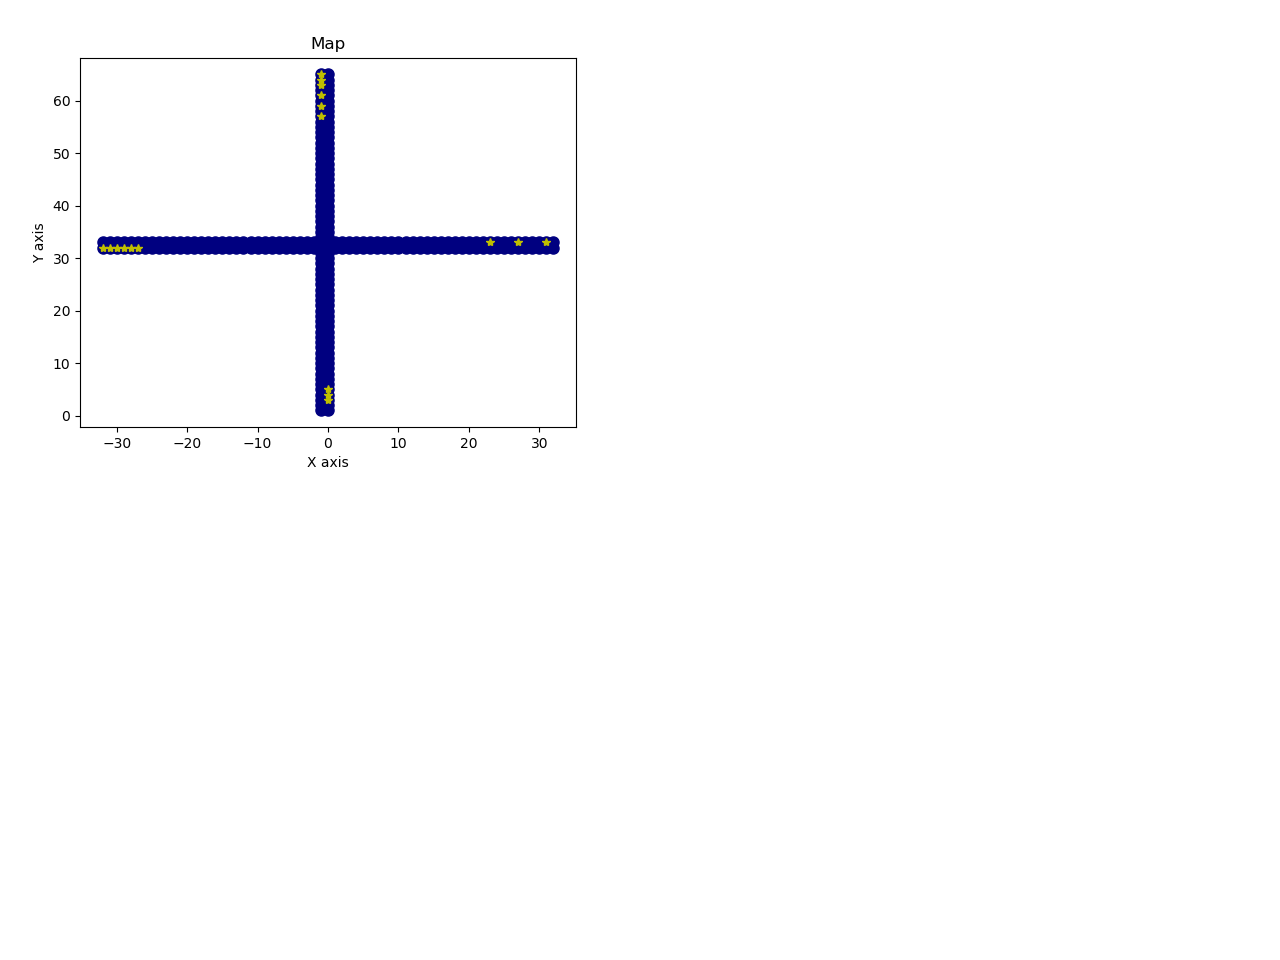

KeyboardInterrupt: 

In [133]:
%matplotlib notebook
TOTAL_TIME = 1
interval = 0.01

fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()
dist = {'mean':carRateMean.value,'var':carRateVar.value}
SF = City(acciProb=acciProb.value,totalTime=TOTAL_TIME, interval=interval, name = 'SF')
SF.freshMap()
SF.createRoad(direction = (0,1),startPos = (0,1),numOfCell=numOfCell.value, moveProb=carMoveProb.value, introRate=introRate.value, remvRate=remvRate.value, carRate=dist)
SF.createRoad(direction = (1,0), startPos = (-int(numOfCell.value/2),int(numOfCell.value/2)), numOfCell=numOfCell.value, moveProb=carMoveProb.value, introRate=introRate.value, remvRate=remvRate.value, carRate=dist)
SF.createRoad(direction = (0,-1),startPos = (-1,int(numOfCell.value)),numOfCell=numOfCell.value, moveProb=carMoveProb.value, introRate=introRate.value, remvRate=remvRate.value, carRate=dist)
SF.createRoad(direction = (-1,0), startPos = (int(numOfCell.value/2),int(numOfCell.value/2)+1), numOfCell=numOfCell.value, moveProb=carMoveProb.value, introRate=introRate.value, remvRate=remvRate.value, carRate=dist)

startTime = 0
Stop = False
currentTime = startTime - interval

fig.show()
fig.canvas.draw()

while not Stop:
    currentTime = currentTime + interval
    if currentTime > TOTAL_TIME:
        Stop = True
    SF.introCar()
    SF.remvCar()
    #SF.moveCar()
    ###########################
    SF.moveCarWithCRA()
    ###########################
    SF.showCitySub()
    time.sleep(0.05)

Since there is a crossroad and we don't have police officers to help keeping the order. We decided to add traffic lights. 

<IPython.core.display.Javascript object>


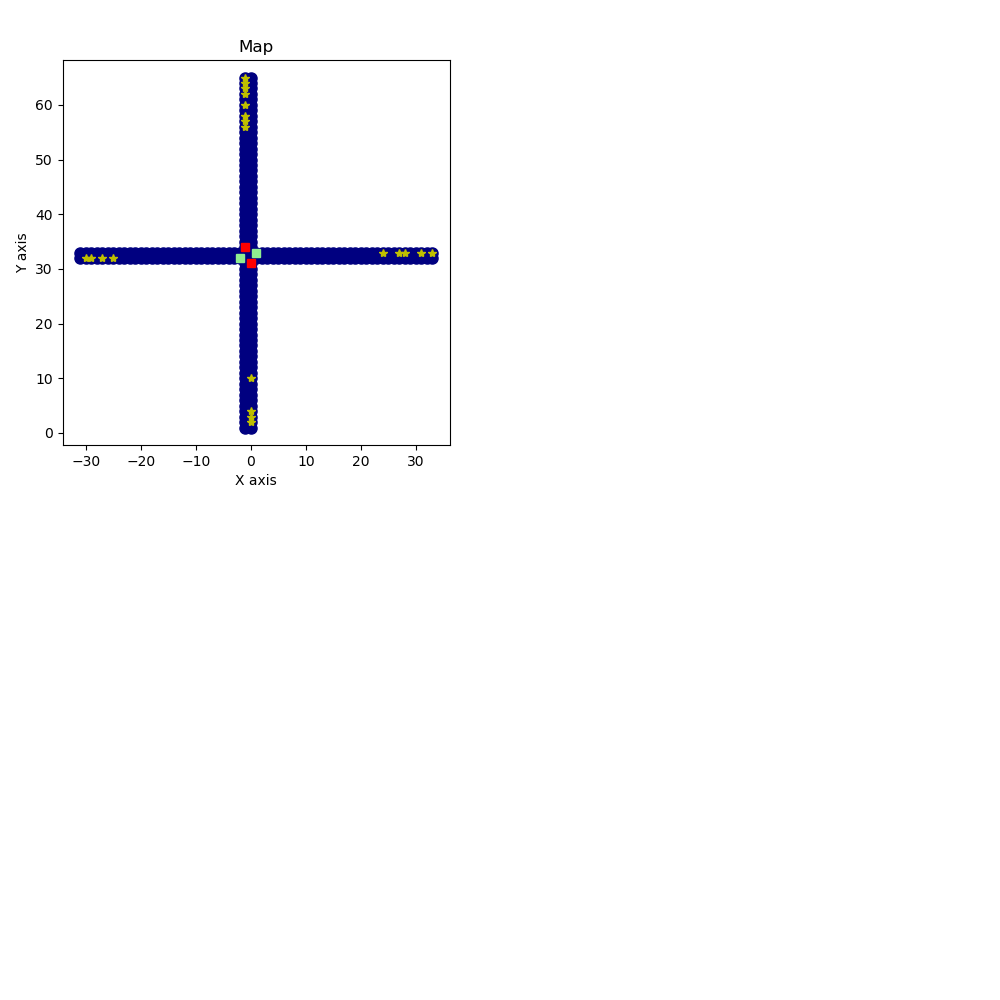

KeyboardInterrupt: 

In [134]:
%matplotlib notebook
TOTAL_TIME = 100
interval = 0.01

fig = plt.figure(figsize =(5,5))
ax = fig.add_subplot(111)
plt.ion()

dist = {'mean':carRateMean.value,'var':carRateVar.value}
SF = City(acciProb=acciProb.value,totalTime=TOTAL_TIME, interval=interval, name = 'SF')
SF.freshMap()
SF.createRoad(direction = (0,1),startPos = (0,1),numOfCell=numOfCell.value, moveProb=carMoveProb.value, introRate=introRate.value, remvRate=remvRate.value, carRate=dist)
SF.createRoad(direction = (1,0), startPos = (-int(numOfCell.value/2)+1,int(numOfCell.value/2)), numOfCell=numOfCell.value, moveProb=carMoveProb.value, introRate=introRate.value, remvRate=remvRate.value, carRate=dist)
SF.createRoad(direction = (0,-1),startPos = (-1,int(numOfCell.value)),numOfCell=numOfCell.value, moveProb=carMoveProb.value, introRate=introRate.value, remvRate=remvRate.value, carRate=dist)
SF.createRoad(direction = (-1,0), startPos = (int(numOfCell.value/2)+1,int(numOfCell.value/2)+1), numOfCell=numOfCell.value, moveProb=carMoveProb.value, introRate=introRate.value, remvRate=remvRate.value, carRate=dist)
startTime = 0
Stop = False
currentTime = startTime - interval

fig.show()
fig.canvas.draw()

position1 = (-1,int(numOfCell.value/2)+2)
position2 = (1,int(numOfCell.value/2)+1)
position3 = (0,int(numOfCell.value/2)-1)
position4 = (-2,int(numOfCell.value/2))
counter = 0

while not Stop:
    currentTime = currentTime + interval
    if currentTime > TOTAL_TIME:
        Stop = True
    SF.introCar()
    SF.remvCar()
    #SF.moveCar()
    ###########################
    SF.moveCarWithCRA()
    ###########################
    SF.crossRoadLight2(position1, position2, position3, position4, counter)
    SF.showCitySub()
    time.sleep(0.05)
    counter += 1
#     print (len(SF.roads[0].allCars),end=" ")

Then, what if we have many roads? You can decide how many roads we have (However, the roads are randomly generated, don't be fraustrated when the roads are ugly).

In [97]:
numRoads = widgets.IntSlider(value=1,min=1, max=100, step=1, description='numRoads: ')

roadsUI = widgets.VBox([numRoads])

def g(numRoads):
    print('Now we have '+str(numRoads)+ ' roads in our city.')
    return numRoads

roadsOut = widgets.interactive_output(g, {'numRoads': numRoads})

print('Please use the sliders below to adjust the number of roads.')

display(roadsUI, roadsOut)


Please use the sliders below to adjust the number of roads.


Output()

<IPython.core.display.Javascript object>


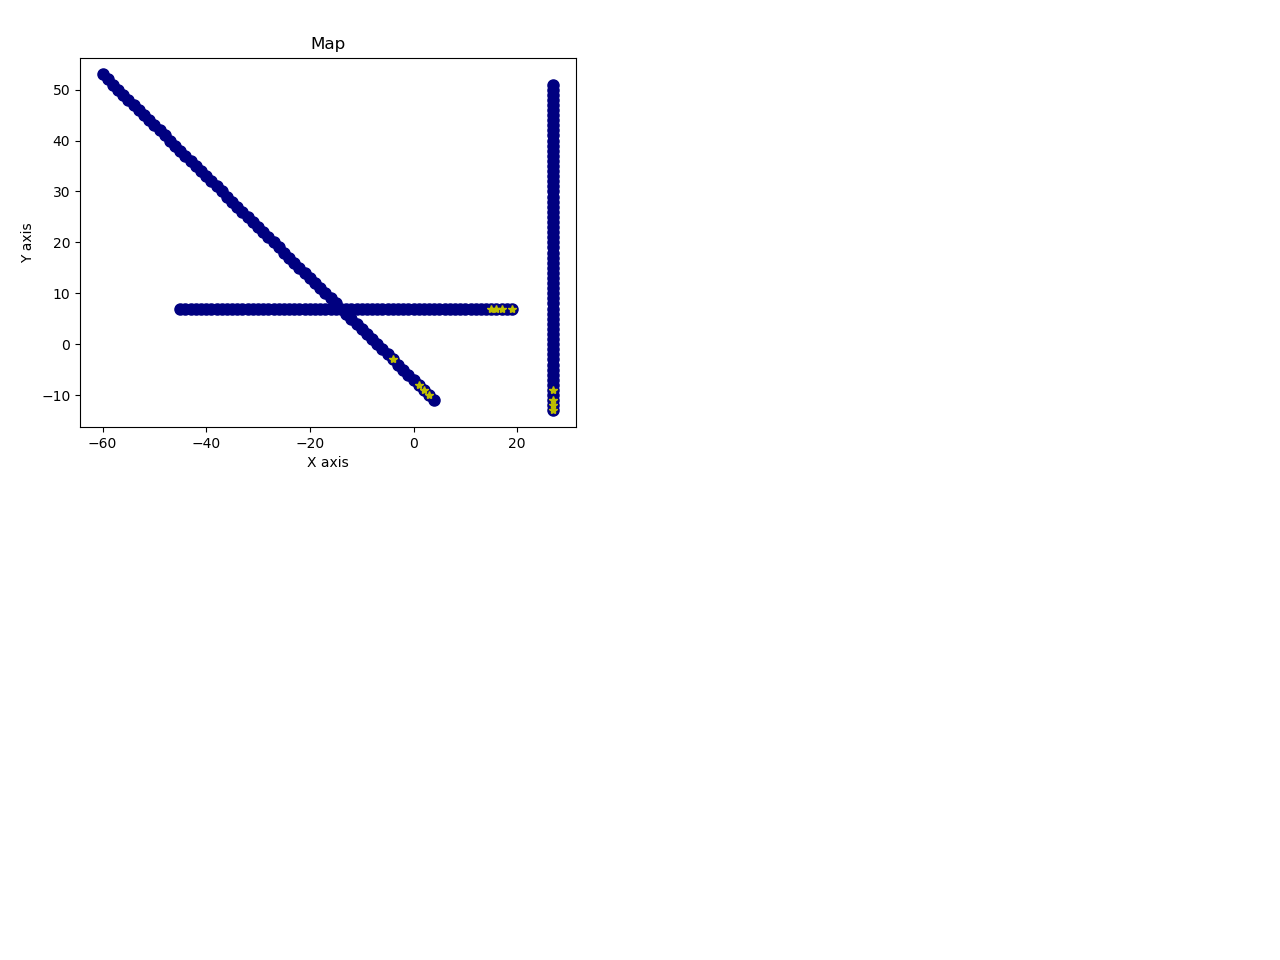

KeyboardInterrupt: 

In [135]:
%matplotlib notebook
TOTAL_TIME = 10
interval = 0.01

fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

SF = City(acciProb=acciProb.value,totalTime=TOTAL_TIME, interval=interval, name = 'SF')
SF.freshMap()
dist = {'mean':carRateMean.value,'var':carRateVar.value}

for i in range(numRoads.value):
    randDirection = np.random.choice([0,1,-1],size=2)
#     randDirection = np.random.rand(1,2)
#     print(randDirection)
    if (list(randDirection) == [0,1]):
        randStartX = np.random.randint(low=-int(numOfCell.value/2),high=int(numOfCell.value/2))
        randStartY = np.random.randint(low=-int(numOfCell.value/2),high=0)
    elif(list(randDirection) == [1,1]):
        randStartX = np.random.randint(low=-int(numOfCell.value/2),high=0)
        randStartY = np.random.randint(low=-int(numOfCell.value/2),high=0)
    elif(list(randDirection) == [1,0]):
        randStartX = np.random.randint(low=-int(numOfCell.value/2),high=0)
        randStartY = np.random.randint(low=-int(numOfCell.value/2),high=int(numOfCell.value/2))
    elif(list(randDirection) == [0,-1]):
        randStartX = np.random.randint(low=-int(numOfCell.value/2),high=int(numOfCell.value/2))
        randStartY = np.random.randint(low=0,high=int(numOfCell.value/2))
    elif(list(randDirection) == [-1,0]):
        randStartX = np.random.randint(low=0,high=int(numOfCell.value/2))
        randStartY = np.random.randint(low=-int(numOfCell.value/2),high=int(numOfCell.value/2))
    elif(list(randDirection) == [-1,-1]):
        randStartX = np.random.randint(low=0,high=int(numOfCell.value/2))
        randStartY = np.random.randint(low=0,high=int(numOfCell.value/2))
    elif(list(randDirection) == [-1,1]):
        randStartX = np.random.randint(low=0,high=int(numOfCell.value/2))
        randStartY = np.random.randint(low=-int(numOfCell.value/2),high=0)
    elif(list(randDirection) == [1,-1]):
        randStartX = np.random.randint(low=-int(numOfCell.value/2),high=0)
        randStartY = np.random.randint(low=0,high=int(numOfCell.value/2))
    else:
        continue
    SF.createRoad(direction = (randDirection[0],randDirection[1]), startPos = (randStartX,randStartY), numOfCell=numOfCell.value, moveProb=carMoveProb.value, introRate=introRate.value, remvRate=remvRate.value, carRate=dist)

startTime = 0
Stop = False
currentTime = startTime - interval

fig.show()
fig.canvas.draw()

while not Stop:
    currentTime = currentTime + interval
    if currentTime > TOTAL_TIME:
        Stop = True
    SF.introCar()
    SF.remvCar()
    SF.moveCar()
    SF.showCitySub()
    time.sleep(0.05)
    

# Appendix

In order to show how the average passing cars and car density on the road change w.r.t changes of running time, the dynamic plots are given below.

<IPython.core.display.Javascript object>


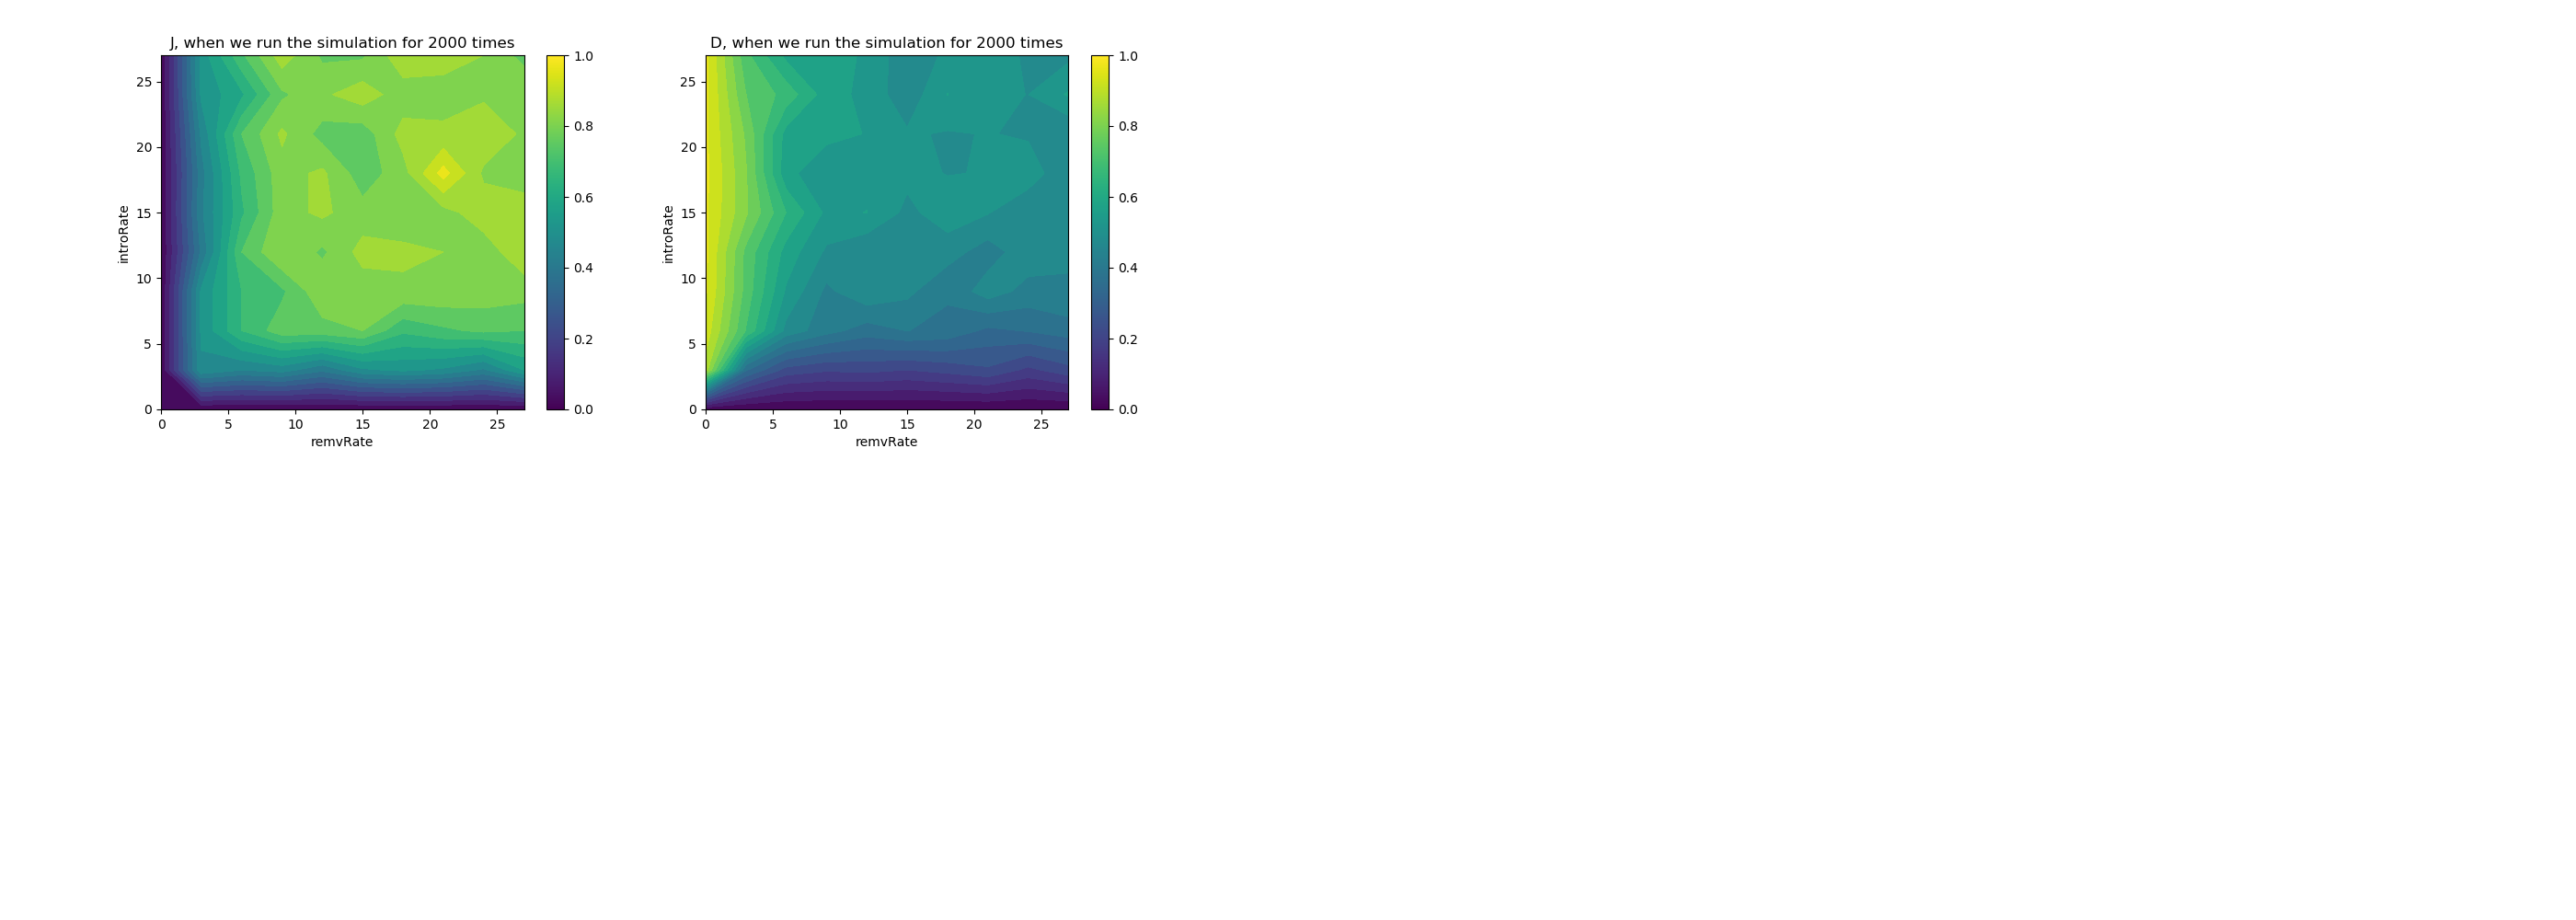

/Users/ten/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Users/ten/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


KeyboardInterrupt: 

In [141]:
import numpy as np
import matplotlib.pyplot as plt

TOTAL_TIME = 500
interval = 0.01

x = np.arange(0, 30, 3)
y = np.arange(0, 30, 3)
# print("_"*100)
fig = plt.figure(figsize=(14,5))
ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
plt.ion()

fig.show()
fig.canvas.draw()
cb=fig.colorbar(plt.cm.ScalarMappable(), ax=ax)
cb1=fig.colorbar(plt.cm.ScalarMappable(), ax=ax2)
dist = {'mean':3,'var':0}

for t in range(10,TOTAL_TIME,10):
    j = []
    d = []
    SF = City(acciProb=0,totalTime=t, interval=interval, name = 'SF')
    for ir in x:
        jj = []
        dd = []
        for rr in y:
            SF.freshMap()
            SF.createRoad(numOfCell=10, moveProb=0.5, introRate=ir, remvRate=rr, carRate={'mean':25,'var':5})
            startTime = 0
            Stop = False
            currentTime = startTime - interval
            while not Stop:
                currentTime = currentTime+interval
                if currentTime > t:
                    Stop = True
                SF.introCar()
                SF.remvCar()
                SF.moveCar()
                SF.Time_sum_car()
            SF.calculateRate()
            jj.append(SF.J)
#             print(SF.J)
            dd.append(SF.density)
#             print ("|",end="")
        j.append(jj)
        d.append(dd)
        
    ax.clear()
#     cb.remove()
    plt.subplot(121)
    array_z = np.array(j)
    array_x,array_y = np.meshgrid(x,y)
    surf = ax.contourf(array_x,array_y,array_z,20)
    plt.xlabel('remvRate')
    plt.ylabel('introRate')
    plt.title("J, when we run the simulation for "+str(t*100)+" times")
    
#     ax.colorbar()
#     cb=fig.colorbar(plt.cm.ScalarMappable(), ax=ax)
#     plt.savefig('1roadJ_carRateNormal.png')
#     ax.show()

    plt.subplot(122)
    
    array_z1 = np.array(d)
    array_x1,array_y1 = np.meshgrid(x,y)
    surf1 = plt.contourf(array_x1,array_y1,array_z1,20)
    plt.xlabel('remvRate')
    plt.ylabel('introRate')
    plt.title("D, when we run the simulation for "+str(t*100)+" times")
    
    
    fig.canvas.draw()
   
print ('\n\nSimluation Done!')